## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
from function_data_processing import *
from function_ML import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


In [3]:
# in the real case scenario we dont have the test set (first split --> metrix only training set)
# academic project : before the split

## Train the model

In [6]:
X = data1.drop('fetal_health', axis = 1)
y  = data1['fetal_health']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 14), (423, 14), (1690,), (423,))

## Scaling the imbalanced data: Upsampling

In [9]:
y_train.value_counts()

A    1305
B     238
C     147
Name: fetal_health, dtype: int64

In [11]:
upsample = pd.concat([X_train, y_train], axis =1)
upsample

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
1491,76.829840,-1.833548,-3.904537,-1.363542,-1.677820,21.615679,-1.698371,7.498550,-0.229605,13.413574,1.339612,2.228554,53149.942412,1.424686,A
1105,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,15.637316,-1.698371,2.072439,-0.229605,9.456557,1.339612,0.000000,53149.942412,1.122632,A
162,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,18.683316,-1.698371,5.280009,-0.229605,15.146484,1.339612,0.752864,53149.942412,1.424686,A
1553,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,26.305597,-1.698371,0.842500,-0.229605,10.958094,1.339612,0.752864,53149.942412,0.702658,A
1607,83.021340,-1.833548,-3.904537,-1.363542,-1.654421,33.422585,-1.698371,7.498550,-0.746032,23.892121,1.339612,2.877034,53149.942412,4.318061,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,77.866926,-1.833548,-3.904537,-1.363542,-1.623717,29.915487,-1.698371,7.498550,-0.229605,21.207673,1.339612,1.956520,53149.942412,5.194186,A
1095,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,12.989068,-1.698371,7.498550,-0.229605,11.134744,1.339612,1.639072,53149.942412,1.424686,A
1130,72.659587,-1.833548,-3.904537,-1.363542,-1.682980,13.528059,-1.698371,7.498550,-0.229605,15.689672,1.339612,1.253648,53149.942412,3.475492,A
1294,80.965641,-1.833548,-3.904537,-1.363542,-1.672667,18.683316,-1.698371,6.489261,-0.229605,16.859660,1.339612,1.956520,53149.942412,2.929005,A


In [13]:
A = upsample[upsample['fetal_health'] == 'A'].sample(1300) # needs the replace because it has less than 400 rows
B = upsample[upsample['fetal_health'] == 'B'].sample(1300, replace=True)
C = upsample[upsample['fetal_health'] == 'C'].sample(1300, replace=True)

upsampled_df = pd.concat([A, B, C]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe


In [14]:
upsampled_df.shape

(3900, 15)

In [16]:
upsampled_df['fetal_health'].value_counts()

B    1300
C    1300
A    1300
Name: fetal_health, dtype: int64

In [17]:
X_train_up = upsampled_df.drop(['fetal_health'], axis =1)
y_train_up = upsampled_df['fetal_health']

### Scaling the numericals and save the transformation file

In [19]:
transformer = StandardScaler().fit(X_train_up)
x_standardized = transformer.transform(X_train_up)

In [20]:
transformer = StandardScaler().fit(X_test)
x_standardized = transformer.transform(X_test)

In [21]:
X_train_up.shape, X_test.shape

((3900, 14), (423, 14))

## Model evaluation of upsampling metrix
Here we will test on Logistic Regression, KNN and Random Forest

### Logistic regression

In [22]:
def model_comparison(X, y, K_value):
    
    print('Comparison 1. Logistic regression')
    # Logistic regression: accuracy score
    classification = LogisticRegression(random_state=42, max_iter=10000)
    classification.fit(X, y)
    
    print('1) Logistic regression score:', classification.score(X_test, y_test))
    
    # Confusion metrix
    print('2) Confustion metrix:')
    predictions = classification.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    
    # Plot confusion metrix
    print('3) Confustion metrix plot: see bottom plot')
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A', 'False A',
               'False B', 'True B', 'False B',
               'False C', 'False C', 'True C']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues'))
    
    print('4) Classification report:')
    print(classification_report(y_test, classification.predict(X_test)))
    
    
    print('Comparison 2. KNN Classifier')
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X, y)
    
    print('1) KNN Classifier accuracy score:')
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    
    print('2) Confusion metrix:')
    predictions_knn = model.predict(X_test)
    confusion_matrix(y_test, predictions_knn)
    
    
    print('3) Classification report') 
    print(classification_report(y_test, model.predict(X_test)))
    
    print('3) Comparison 3. Decision Tree')
    model = DecisionTreeClassifier()
    model.fit(X, y)
    print(model.score(X_test, y_test))
    
    
    


Comparison 1. Logistic regression
1) Logistic regression score: 0.6619385342789598
2) Confustion metrix:
[[225  52  64]
 [  5  36  13]
 [  3   6  19]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.97      0.66      0.78       341
           B       0.38      0.67      0.49        54
           C       0.20      0.68      0.31        28

    accuracy                           0.66       423
   macro avg       0.52      0.67      0.53       423
weighted avg       0.84      0.66      0.71       423

Comparison 2. KNN Classifier
1) KNN Classifier accuracy score:
0.7541371158392435
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.97      0.74      0.84       341
           B       0.44      0.80      0.57        54
           C       0.38      0.89      0.54        28

    accuracy     

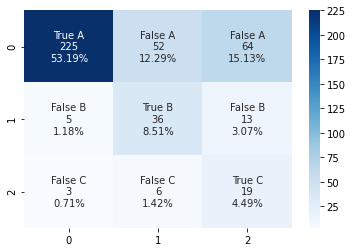

In [23]:
model_comparison(X_train_up, y_train_up, 15)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [24]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_up, y_train_up)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.9125295508274232,
 0.8723404255319149,
 0.8297872340425532,
 0.8132387706855791,
 0.8037825059101655,
 0.7801418439716312,
 0.7612293144208038,
 0.7541371158392435,
 0.7635933806146572,
 0.7706855791962175]

Text(0, 0.5, 'Accuracy')

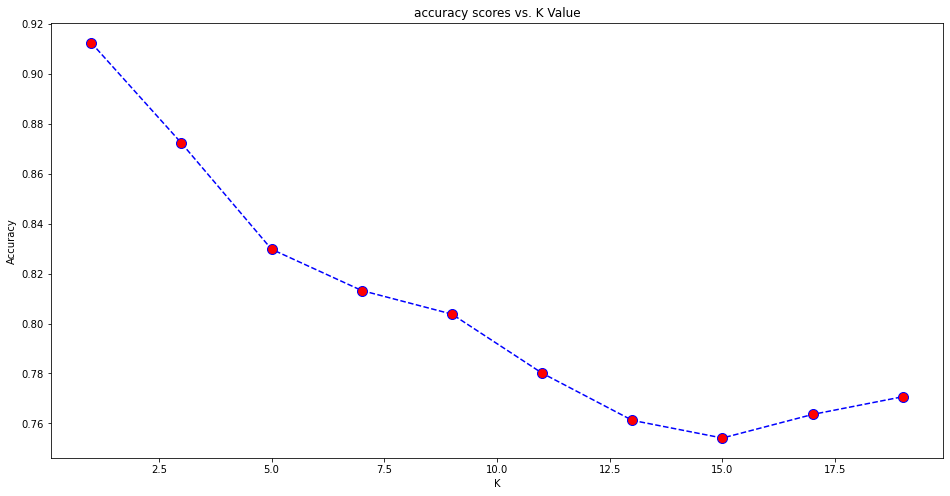

In [25]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [26]:
def model_knn_classifier(X, y, K_value):
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X, y)
    
    print('1) KNN Classifier accuracy score:')
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    
    print('2) Confusion metrix:')
    predictions_knn = model.predict(X_test)
    confusion_matrix(y_test, predictions_knn)
    
    
    print('3) Classification report') 
    print(classification_report(y_test, model.predict(X_test)))

### Apply into KNN model
Use funtion from .py file

In [28]:
model_knn_classifier(X_train_up, y_train_up, 5)

1) KNN Classifier accuracy score:
0.8297872340425532
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.96      0.84      0.90       341
           B       0.46      0.76      0.57        54
           C       0.66      0.82      0.73        28

    accuracy                           0.83       423
   macro avg       0.69      0.81      0.73       423
weighted avg       0.88      0.83      0.85       423



### Decision Tree

In [ ]:
#def model_decision_tree():
 #   model = DecisionTreeClassifier()
  #  model.fit(X_train, y_train)
   # print(model.score(X_test, y_test))
    

In [29]:
model = DecisionTreeClassifier()


In [30]:
model.fit(X_train_up, y_train_up)


DecisionTreeClassifier()

In [31]:
model.score(X_test, y_test)

0.900709219858156

In [32]:
model.feature_importances_


array([0.23893466, 0.01126444, 0.        , 0.        , 0.04108203,
       0.33581149, 0.        , 0.03484901, 0.00073943, 0.11538099,
       0.        , 0.04852768, 0.        , 0.17341027])

### Random Forest

In [33]:
clf = RandomForestClassifier(max_depth = 5, random_state = 0)
clf.fit(X_train_up, y_train_up)
print(clf.score(X_test, y_test))

0.8463356973995272
